In [1]:
!python --version

Python 3.13.5


In [2]:
import pickle


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error


In [3]:
# Jan 2021
january2021 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet'

# Feb 2021
february2021 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet'

In [4]:
df = pd.read_parquet(january2021)

In [5]:
display(df)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [6]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)

df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [7]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [8]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

9.838799799829626

/tmp/ipykernel_20248/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_20248/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


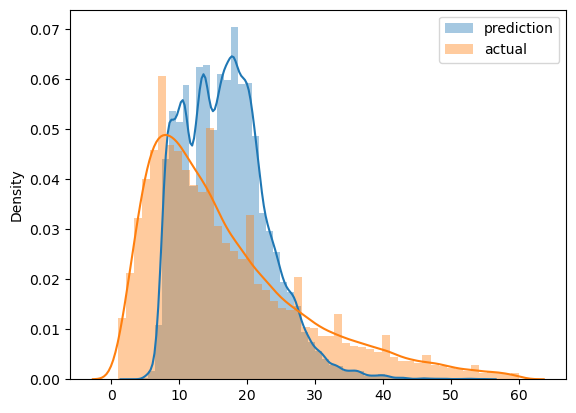

In [9]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [10]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    mask = (df.duration >= 1) & (df.duration <= 60)
    df = df.loc[mask].assign(
        PULocationID=lambda d: d['PULocationID'].astype('string'),
        DOLocationID=lambda d: d['DOLocationID'].astype('string')
    )
    
    return df

In [11]:
df_train = read_dataframe(january2021)
df_val = read_dataframe(february2021)

In [12]:
len(df_train), len(df_val)

(73908, 61921)

In [13]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [14]:
categorical = ['PU_DO']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [15]:
dv.feature_names_

['PU_DO=100_168',
 'PU_DO=100_180',
 'PU_DO=100_190',
 'PU_DO=100_225',
 'PU_DO=100_235',
 'PU_DO=100_42',
 'PU_DO=100_49',
 'PU_DO=100_69',
 'PU_DO=100_82',
 'PU_DO=100_89',
 'PU_DO=101_101',
 'PU_DO=101_13',
 'PU_DO=101_135',
 'PU_DO=101_139',
 'PU_DO=101_16',
 'PU_DO=101_175',
 'PU_DO=101_188',
 'PU_DO=101_19',
 'PU_DO=101_191',
 'PU_DO=101_196',
 'PU_DO=101_205',
 'PU_DO=101_218',
 'PU_DO=101_219',
 'PU_DO=101_226',
 'PU_DO=101_260',
 'PU_DO=101_265',
 'PU_DO=101_64',
 'PU_DO=101_7',
 'PU_DO=101_75',
 'PU_DO=101_86',
 'PU_DO=101_95',
 'PU_DO=102_102',
 'PU_DO=102_117',
 'PU_DO=102_121',
 'PU_DO=102_130',
 'PU_DO=102_131',
 'PU_DO=102_134',
 'PU_DO=102_139',
 'PU_DO=102_145',
 'PU_DO=102_16',
 'PU_DO=102_160',
 'PU_DO=102_164',
 'PU_DO=102_182',
 'PU_DO=102_196',
 'PU_DO=102_197',
 'PU_DO=102_198',
 'PU_DO=102_205',
 'PU_DO=102_21',
 'PU_DO=102_219',
 'PU_DO=102_235',
 'PU_DO=102_236',
 'PU_DO=102_242',
 'PU_DO=102_249',
 'PU_DO=102_258',
 'PU_DO=102_263',
 'PU_DO=102_28',
 'PU_DO=1

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73908 entries, 0 to 76517
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               73908 non-null  int64         
 1   lpep_pickup_datetime   73908 non-null  datetime64[us]
 2   lpep_dropoff_datetime  73908 non-null  datetime64[us]
 3   store_and_fwd_flag     38175 non-null  object        
 4   RatecodeID             38175 non-null  float64       
 5   PULocationID           73908 non-null  string        
 6   DOLocationID           73908 non-null  string        
 7   passenger_count        38175 non-null  float64       
 8   trip_distance          73908 non-null  float64       
 9   fare_amount            73908 non-null  float64       
 10  extra                  73908 non-null  float64       
 11  mta_tax                73908 non-null  float64       
 12  tip_amount             73908 non-null  float64       
 13  tolls_

In [17]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.758715204657856

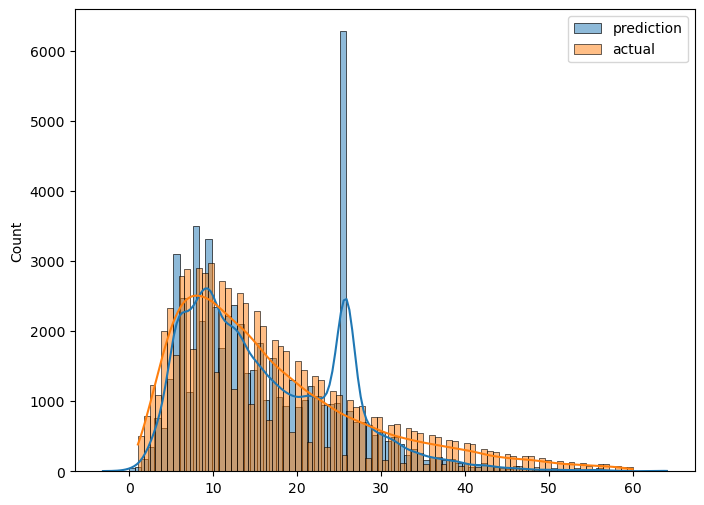

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(y_pred, label='prediction', kde=True, ax=ax)
sns.histplot(y_train, label='actual', kde=True, ax=ax)
ax.legend()
plt.show()

In [20]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [21]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

11.167275941179728